# 1. Markov Chain

This is Inspired by these videos.
https://www.youtube.com/watch?v=Uz3JIp6EvIg

## 2. Definition

Markov is a mathematical model that describes a system transitioning from one state to another based on probabilistic rules, and the chances of transiting to other variable

# 3. Coding goals

I planned to create a random graph that each line transitions to the other have a probabilistic values from the function *randomize_graph(<number_of_nodes>:int)*, and then have a function called *transitional_matrix(<graph>:dict)* -> np.darray, and from that we create a function that creates the initiate *vector init_vector(<index_of_the_first_choice>: int) *-> np.darray, and finally, we will have the iteration function that will take the initator vector into a certain iteration based on the user inputs, or if there is no input -> it will do it 2 times in the function *markov_chain_iteration(<number_of_iteration>:int)*

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import networkx as nx
from IPython.display import display, Math

class Markov_chain:
    def __init__(self, number_of_nodes : int = 2, index_of_the_first_choice : int = 1, iteration_num : int = 2):
        self.number_of_nodes = number_of_nodes
        self.graph = {}
        self.visualize_nx_graph = None
        self.index_of_the_first_choice = index_of_the_first_choice
        self.iteration_num = iteration_num
    
    def randomize_graph(self) -> dict:
        graph = {}
        for i in range(self.number_of_nodes):
            n = 0
            graph[i] = {}
            for j in range(self.number_of_nodes):
                prob = round(random.uniform(0, (1 - n)/2.5), 4)
                if j != self.number_of_nodes - 1:
                    graph[i][j] = prob
                else:
                    graph[i][j] = 1 - n
                n += prob
                
        self.graph = graph
        
        return graph
    
    def visualize_graph(self):
        visualize_graph = nx.DiGraph()
        graph_create = Markov_chain(self.number_of_nodes)
        self.graph = graph_create.randomize_graph()
        for from_node, edges in self.graph.items():
            for to_node, prob in edges.items():
                visualize_graph.add_edge(from_node, to_node, weight = prob)
                
        self.visualize_nx_graph = visualize_graph
        
        position = nx.spring_layout(visualize_graph)
        weight = nx.get_edge_attributes(visualize_graph, "weight")
        nx.draw(visualize_graph, position, with_labels = True, node_color="darkred", font_color="white", node_size = 1000, arrowsize=20)
        nx.draw_networkx_edge_labels(visualize_graph, position, edge_labels={k: f"{v:.2f}" for k, v in weight.items()})
        plt.title("Randomize Markov Chain Graph")
        plt.show()
        
    def transitional_matrix_conversion(self) -> np.ndarray:
        transitional_matrix = []
        for content in self.graph.values():
            transitional_matrix.append([prob for prob in content.values()])
        transitional_matrix = np.array(transitional_matrix)
        self.transitional_matrix = transitional_matrix
        return transitional_matrix
        
    def init_vector(self) -> np.ndarray:
        initiate_vector = [0 for _ in range(self.number_of_nodes)]
        initiate_vector[self.index_of_the_first_choice] = 1
        initiate_vector = np.array(initiate_vector)
        self.initiate_vector = initiate_vector
        return initiate_vector
        
    def markov_chain_iteration(self) -> np.ndarray:
        vector_i = self.initiate_vector
        for _ in range(self.iteration_num):
            vector_i = self.transitional_matrix @ vector_i # type: ignore
        return vector_i # type: ignore
    
    def show_markov_chain_iteration_in_latex(self):
        vector_i = self.initiate_vector  # type: ignore # start vector
        
        for it in range(1, self.iteration_num + 1):
            next_vector = self.transitional_matrix @ vector_i # type: ignore
            
            # Build LaTeX strings
            T_latex = "\\begin{bmatrix}" + " \\\\ ".join(
                [" & ".join([f"{v:.2f}" for v in row]) for row in self.transitional_matrix] # type: ignore
            ) + "\\end{bmatrix}"
            
            v_latex = "\\begin{bmatrix}" + " \\\\ ".join([f"{v:.4f}" for v in vector_i]) + "\\end{bmatrix}" #type: ignore
            result_latex = "\\begin{bmatrix}" + " \\\\ ".join([f"{v:.4f}" for v in next_vector]) + "\\end{bmatrix}"
            
            latex_equation = f"\\text{{Iteration {it}:}}\\quad {T_latex} \\times {v_latex} = {result_latex}"
            
            display(Math(latex_equation))
            
            # Update vector for next iteration
            vector_i = next_vector

    def equilibrium_dataframe(self) -> np.ndarray:
        vector_i = self.initiate_vector
        data_list = [vector_i.copy()]  # start with initial vector
        
        # Perform iterations
        for i in range(1, self.iteration_num + 1):
            vector_i = self.transitional_matrix @ vector_i  # type: ignore
            data_list.append(vector_i.copy())
        
        # Convert list of arrays to proper 2D NumPy array
        dataframe = np.stack(data_list)  # shape: (iterations+1, num_nodes)
        
        # Save for plotting
        self.dataframe = dataframe
        
        # Optional: display as pandas DataFrame
        dataframe_pandas = pd.DataFrame(dataframe, index=range(dataframe.shape[0]))
        display(dataframe_pandas)
        
        return dataframe


    def equilibrium_graph(self):
        if not hasattr(self, "dataframe"):
            raise ValueError("Run equilibrium_dataframe() first to generate data.")
        
        num_iterations, num_nodes = self.dataframe.shape
        
        plt.figure(figsize=(20,5))
        
        for node_idx in range(num_nodes):
            plt.plot(range(num_iterations), self.dataframe[:, node_idx],
                    marker="o", label=f'Node {node_idx}')
        
        plt.xlabel('Iteration')
        plt.ylabel('Probability')
        plt.title('Convergence of Node Probabilities to Equilibrium')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, max([i for i in self.dataframe[1]]) + 0.05)
        plt.show()



        

{0: {0: 0.0007, 1: 0.361, 2: 0.0272, 3: 0.0483, 4: 0.5628}, 1: {0: 0.3564, 1: 0.0845, 2: 0.0208, 3: 0.0449, 4: 0.49339999999999995}, 2: {0: 0.1775, 1: 0.0763, 2: 0.0185, 3: 0.0842, 4: 0.6435}, 3: {0: 0.3544, 1: 0.208, 2: 0.1504, 3: 0.1035, 4: 0.18369999999999997}, 4: {0: 0.3966, 1: 0.14, 2: 0.1196, 3: 0.1247, 4: 0.21909999999999996}}


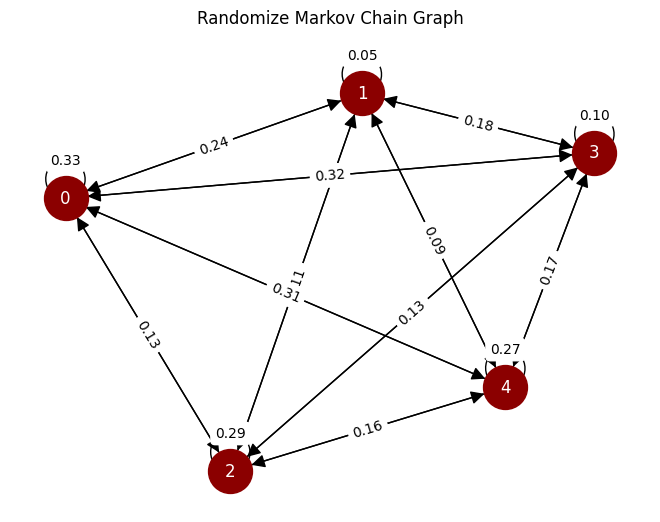

[[0.3275 0.1323 0.1978 0.1235 0.2189]
 [0.241  0.0478 0.0899 0.0077 0.6136]
 [0.1279 0.112  0.2855 0.1271 0.3475]
 [0.3165 0.1785 0.1276 0.0959 0.2815]
 [0.3102 0.0853 0.1605 0.1739 0.2701]]
[0 0 1 0 0]
[0.18403722 0.17709879 0.18886938 0.17249824 0.18038947]


In [280]:
if __name__ == "__main__":
    markov_chain_example = Markov_chain(number_of_nodes=5, index_of_the_first_choice=2, iteration_num=2)
    graph = markov_chain_example.randomize_graph()
    print(graph)
    markov_chain_example.visualize_graph()
    transitional_matrix = markov_chain_example.transitional_matrix_conversion()
    print(transitional_matrix)
    init_vector = markov_chain_example.init_vector()
    print(init_vector)
    final_markov_chain = markov_chain_example.markov_chain_iteration()
    print(final_markov_chain)
    
    
    

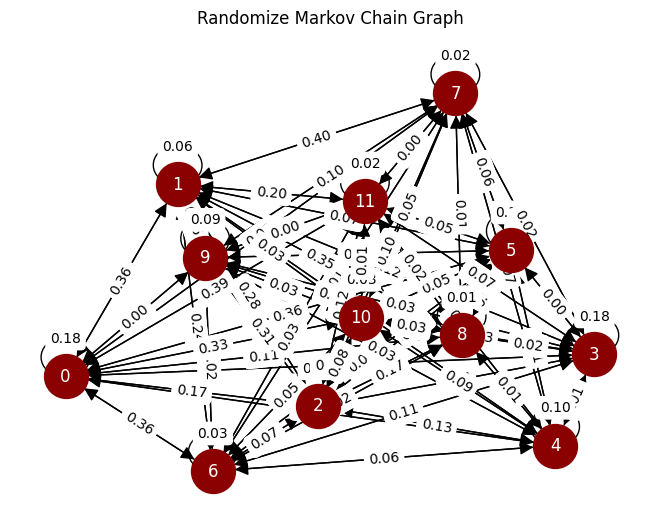

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [281]:
if __name__ == "__main__":
    #this will show on latex
    latex = Markov_chain(number_of_nodes=12, index_of_the_first_choice= 4, iteration_num= 2)
    latex.randomize_graph()
    latex.visualize_graph()
    latex.transitional_matrix_conversion()
    latex.init_vector()
    latex.show_markov_chain_iteration_in_latex()
    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.079400,0.038900,0.247000,0.090200,0.056700,0.053100,0.106800,0.114900,0.036100,0.047000,0.068700,0.039000,0.137500,0.074900,0.003900
2,0.079983,0.104575,0.090807,0.098256,0.085685,0.067950,0.076139,0.063786,0.081832,0.106606,0.064317,0.080693,0.089648,0.087524,0.074755
3,0.089636,0.085839,0.086727,0.084773,0.084999,0.082552,0.088436,0.090260,0.082499,0.081734,0.082962,0.086312,0.089853,0.084138,0.079836
4,0.086440,0.086245,0.085815,0.086376,0.086154,0.086680,0.085751,0.086188,0.086159,0.085897,0.085354,0.085546,0.085935,0.086606,0.085661
5,0.086165,0.086142,0.086047,0.086201,0.086215,0.086238,0.086084,0.086265,0.086237,0.086112,0.086121,0.086161,0.086140,0.086291,0.086215
6,0.086160,0.086157,0.086165,0.086163,0.086176,0.086174,0.086155,0.086173,0.086174,0.086154,0.086203,0.086166,0.086146,0.086177,0.086195
7,0.086164,0.086166,0.086167,0.086167,0.086166,0.086165,0.086166,0.086164,0.086167,0.086168,0.086170,0.086167,0.086165,0.086165,0.086170


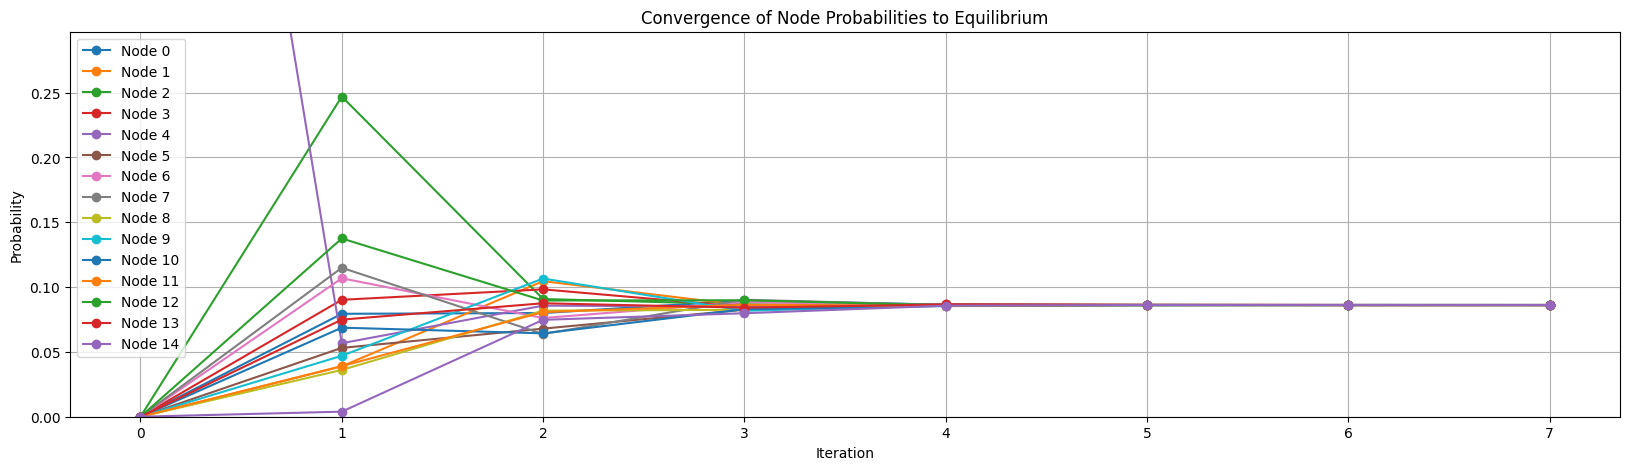

In [282]:
if __name__ == "__main__":
    #this will show on latex
    latex = Markov_chain(number_of_nodes=15, index_of_the_first_choice= 4, iteration_num= 7)
    latex.randomize_graph()
    latex.transitional_matrix_conversion()
    latex.init_vector()
    latex.equilibrium_dataframe()
    latex.equilibrium_graph()

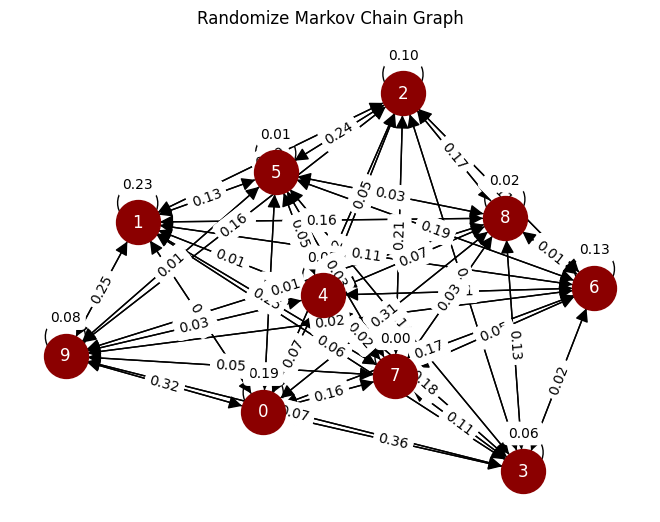

Final vector after iterations:
 [0.24275434 0.2427546  0.24275398 0.24275417 0.24275504 0.24275438
 0.24275475 0.24275453 0.24275444 0.24275454]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.193400,0.371600,0.122700,0.358700,0.068100,0.274300,0.168200,0.160800,0.307400,0.317300
2,0.235173,0.250208,0.232723,0.213306,0.286185,0.226035,0.246490,0.261545,0.233625,0.245763
3,0.247235,0.239178,0.250461,0.246128,0.234182,0.237560,0.238359,0.239185,0.239475,0.240669
4,0.242272,0.244046,0.240623,0.241793,0.241432,0.244830,0.241711,0.243608,0.244103,0.243942
5,0.242754,0.242726,0.242762,0.242708,0.243448,0.242152,0.243123,0.242641,0.242424,0.242659
6,0.242789,0.242724,0.242857,0.242806,0.242557,0.242782,0.242643,0.242741,0.242764,0.242743
7,0.242746,0.242771,0.242716,0.242731,0.242769,0.242775,0.242758,0.242769,0.242768,0.242769
8,0.242756,0.242752,0.242760,0.242758,0.242760,0.242745,0.242758,0.242751,0.242749,0.242751
9,0.242755,0.242755,0.242755,0.242754,0.242751,0.242756,0.242753,0.242755,0.242755,0.242755


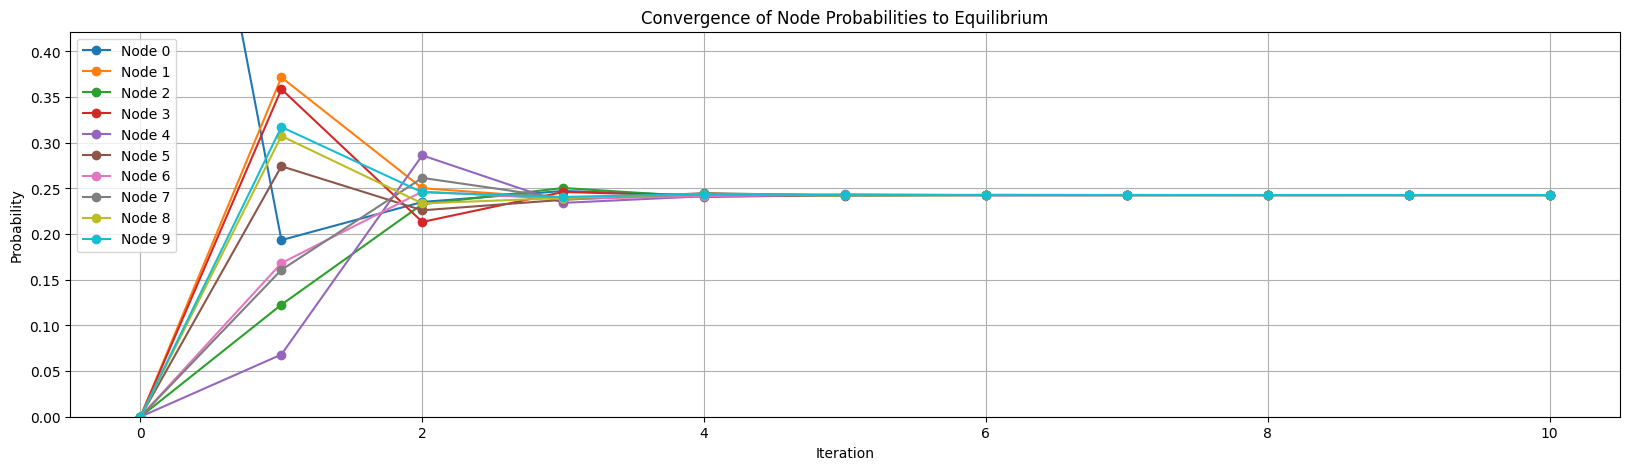

In [283]:
if __name__ == "__main__":
    # Create a Markov chain with 5 nodes, start at node 0, iterate 10 times
    mc = Markov_chain(number_of_nodes=10, index_of_the_first_choice=0, iteration_num=10)
    
    # Generate a random graph
    mc.randomize_graph()
    
    # Visualize the graph
    mc.visualize_graph()
    
    # Convert to transition matrix
    mc.transitional_matrix_conversion()
    
    # Initialize the starting vector
    mc.init_vector()
    
    # Perform Markov chain iterations and show final vector
    final_vector = mc.markov_chain_iteration()
    print("Final vector after iterations:\n", final_vector)
    
    # Display each iteration in LaTeX (if using Jupyter Notebook)
    mc.show_markov_chain_iteration_in_latex()
    
    # Build equilibrium table/dataframe
    mc.equilibrium_dataframe()
    
    # Plot convergence of each node's probability
    mc.equilibrium_graph()
